In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import os
import warnings
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [24]:
warnings.filterwarnings('ignore')
data = 'car_evaluation.csv'
df = pd.read_csv(data, header=None)

In [33]:
df.isnull().sum()
X = df.drop(['class'], axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape
X_train.dtypes
X_train.head()
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train.head()
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


In [31]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9457


In [32]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train, y_train)
y_pred_100 = rfc_100.predict(X_test)
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9457


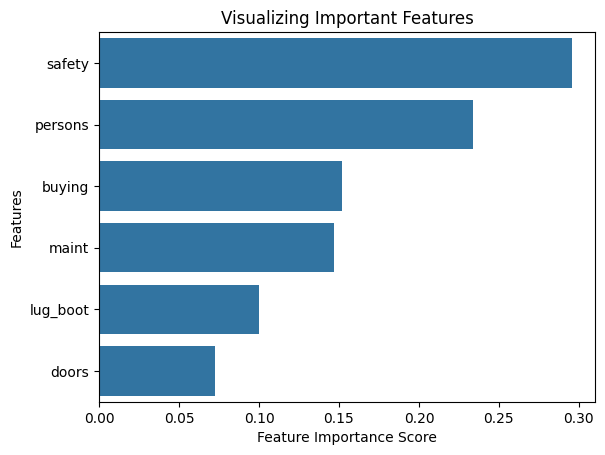

In [26]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [27]:
X = df.drop(['class', 'doors'], axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9264


In [28]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[104  12  10   3]
 [  0  18   0   2]
 [ 10   0 387   0]
 [  3   2   0  20]]


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.89      0.81      0.85       129
        good       0.56      0.90      0.69        20
       unacc       0.97      0.97      0.97       397
       vgood       0.80      0.80      0.80        25

    accuracy                           0.93       571
   macro avg       0.81      0.87      0.83       571
weighted avg       0.93      0.93      0.93       571

